# Python ML: k-Means Clustering

---

This notebook demonstrates k-means clustering using `scikit-learn`.

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The _"cluster center"_ is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

In [18]:
# Credit the NiTheCS
# Adopted from github.com/tirthajyoti/Machine-Learning-with-Python/

In this example we are going to use a plotting library that we have not yet used. Seaborn is a popular plotting library for drawing statistical graphs. It is well-suited for visualising the results from K-means clustering

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import pairwise_distances_argmin


### Create synthetic dataset of unlabelled blobs

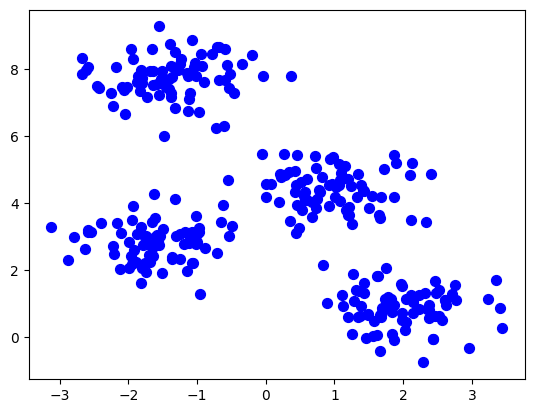

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50,color='blue');

### Fit the data
Note, here we are not doing a test/train split as it is unsupervised machine learning technique.

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

### Visualize the fitted data by coloring the blobs by assigned label numbers
We will use the `c` argument in the `plt.scatter()` function.

We will also try to make the cluster centers prominent.

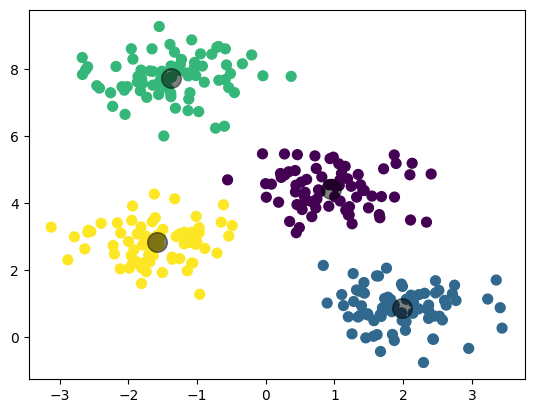

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### How k-means is a special case of Expectation-maximization (EM) algorithm

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and special case of this more general algorithm. The basic algorithmic flow of k-means is to:

- Guess some cluster center (initialization)
- Repeat following steps untill converged,
    - _E-step_: assign points to the nearest cluster center
    - _M-Step_: set the cluster centers to the mean

Here the "E-step" or "Expectation step" involves updating our expectation of which cluster each point belongs to.

The "M-step" or "Maximization step" involves **maximizing some fitness function** that defines the location of the cluster centers. In the case of k-means, that maximization is accomplished by taking a simple mean of the data in each cluster.

### Implementing k-means from scratch

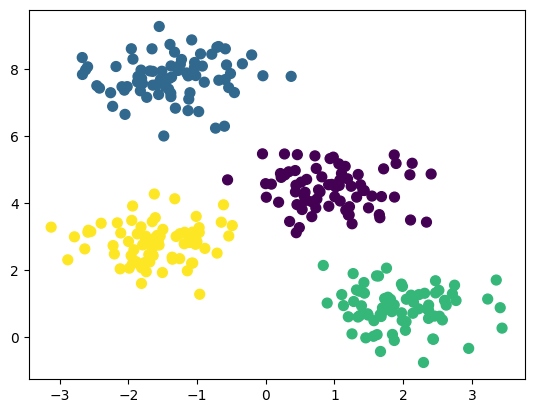

In [ ]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Not optimally guaranteed and initialization
Under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics. However, it is best to note that, **although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the global best solution**.

The **initialization is important** and particularly bad initialization can sometimes lead to clearly sub-optimal clustering.

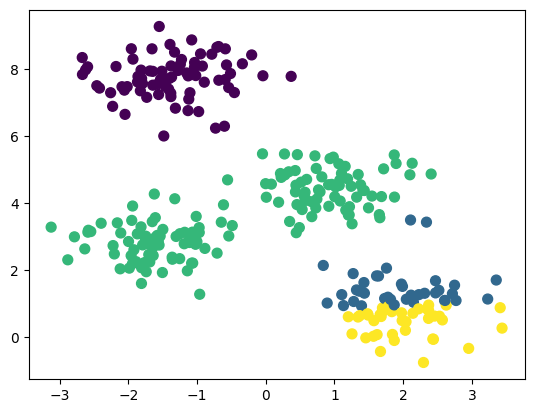

In [7]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Number of clusters?

A common challenge with k-means is that you must tell it how many clusters you expect.
It cannot learn the number of clusters from the data.

If we force the k-means to look for 6 clusters instead of 4, it will come back with 6 but they may not be what we are looking for!

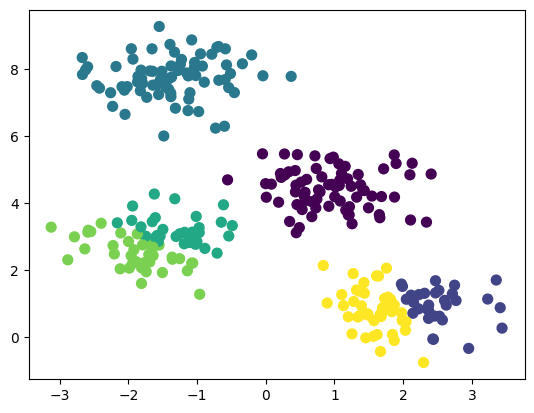

In [8]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Limitations - example
k-means algorithm will often be ineffective if the clusters have complicated geometries. In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries.

In [ ]:
X, y = make_moons(200, noise=.05, random_state=0)

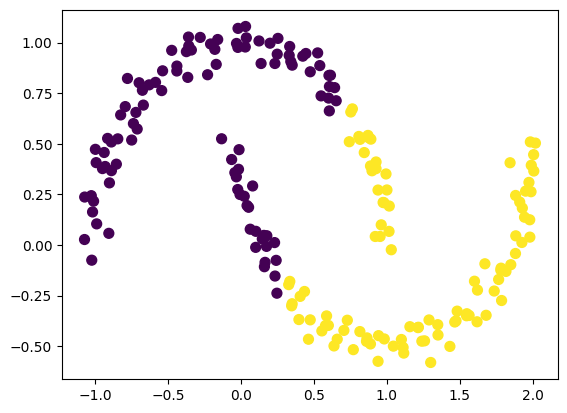

In [10]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Kernel transformations?

In the situation above a linear separation is possible. We can use this trick to allow k-means to discover non-linear boundaries.

One version of this kernelized k-means is implemented in Scikit-Learn within the `SpectralClustering` estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:


c:\Users\Anton\Code\PythonForHydrogeologists\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


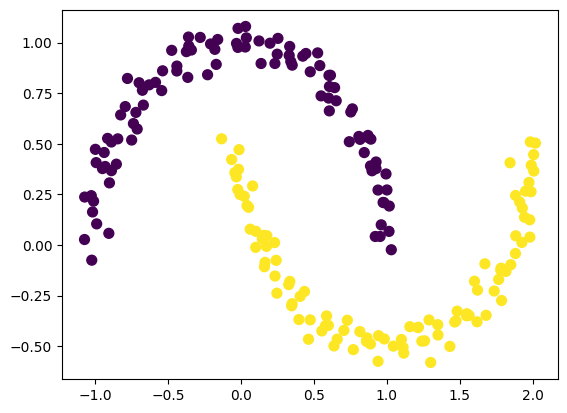

In [ ]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Limitation of k-means

Simplicity of k-means is a big advantage for fast processing of large scale data. But this very simplicity also leads to practical challenges in its application.

In particular, the non-probabilistic nature of k-means and its use of simple distance-from-cluster-center to assign cluster membership leads to poor performance for many real-world situations.

In [ ]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.7, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

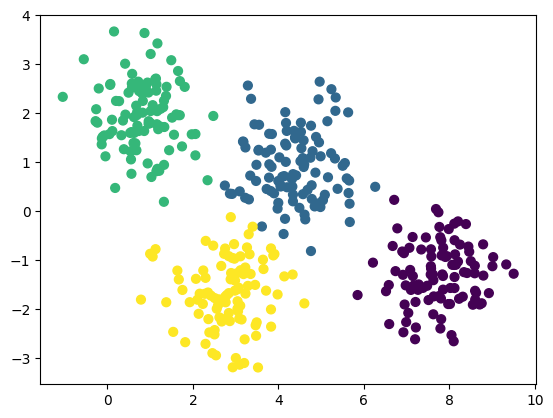

In [ ]:
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k',zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

### k-means fails for non-circular blobs of data
There appears to be a very slight overlap between the two middle clusters, such that we might not have complete confidence in the cluster assigment of points between them. Unfortunately, the **k-means model has no intrinsic measure of probability or uncertainty** of cluster assignments.

For k-means these cluster models must be circular. k-means has **no built-in way of accounting for oblong or elliptical clusters**. So, for example, if we take the same data and transform it, the cluster assignments end up becoming muddled.

k-means is not flexible enough to account for this, and tries to force-fit the data into four circular clusters. This results in a mixing of cluster assignments where the resulting circles overlap.

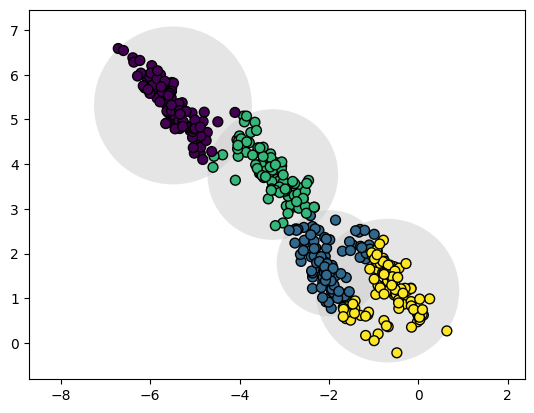

In [17]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)